In [199]:
import pandas as pd
import numpy as np

In [200]:
df =pd.read_excel('/content/iris.xls')

In [201]:
#view the first few entries
df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**Exploratory Data Analysist**

In [202]:
# Checking the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [203]:
#statistical analysis
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [204]:
#Print the number of rows and columns of the dataset
df.shape

(150, 5)

In [205]:
# count number of missing values
df.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [206]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [207]:
# Imputing missing values with mean:
# this will replace the missing values with the mean value of each column.

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df.head(10)

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa
5,5.400000,3.9,1.7,0.4,Iris-setosa
6,4.600000,3.4,1.4,0.3,Iris-setosa
7,5.000000,3.4,1.5,0.2,Iris-setosa
8,4.400000,2.9,1.4,0.2,Iris-setosa
9,4.900000,3.1,1.5,0.1,Iris-setosa


In [208]:
df.isnull().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


In [209]:
df.value_counts('Classification')

,count
Classification,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Data Visualisation**

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

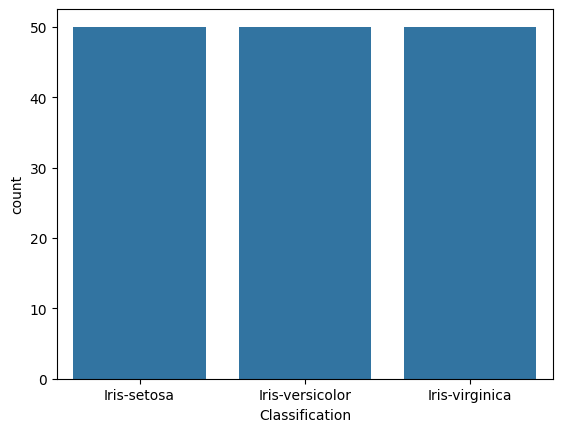

In [211]:
sns.countplot(x='Classification', data=df)
plt.show()

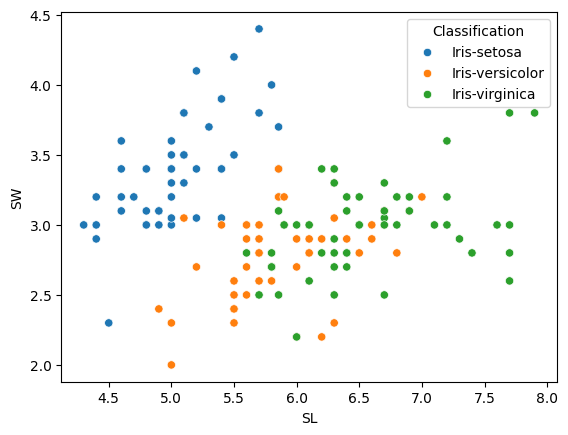

In [212]:
sns.scatterplot(data=df, x='SL', y='SW', hue='Classification')
plt.show()

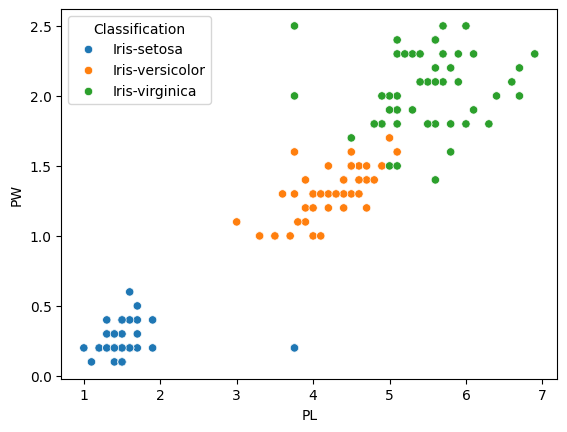

In [213]:
sns.scatterplot(data=df, x='PL', y='PW', hue='Classification')
plt.show()

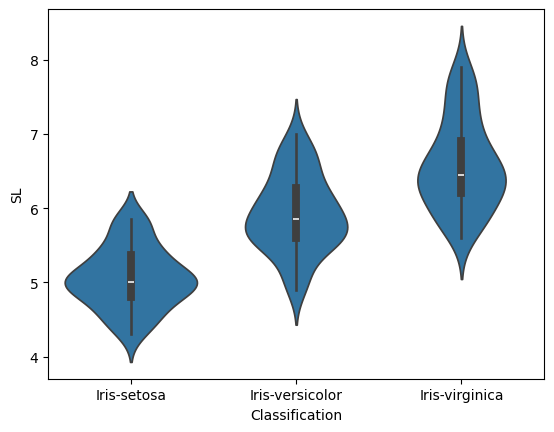

In [214]:
sns.violinplot(x='Classification',y='SL',data=df)
plt.show()

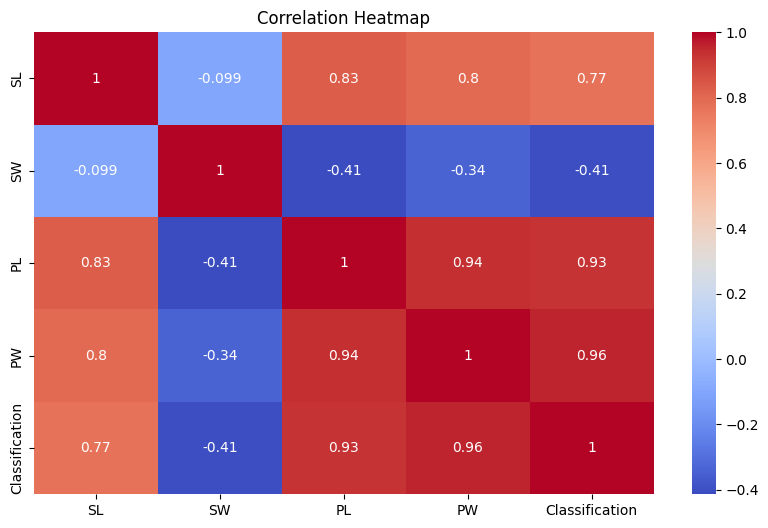

In [215]:
# Convert 'Classification' column to numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

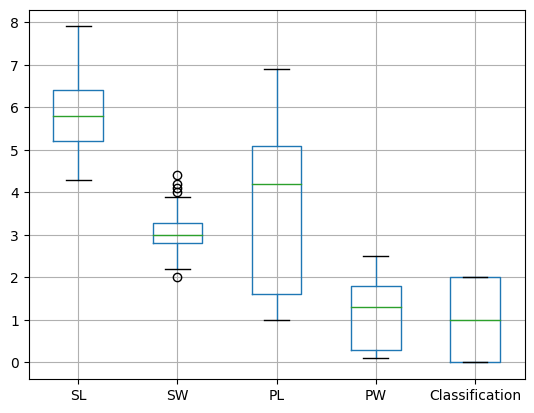

In [216]:
df.boxplot()
plt.show()

In [217]:
# Calculate the IQR
Q1 = df['SW'].quantile(0.25)
Q3 = df['SW'].quantile(0.75)
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify the outliers
# Upper bound
upper = np.where(df['SW'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['SW'] <= (Q1-1.5*IQR))

# Removing the Outliers
# Reset the index before dropping to avoid KeyError
df = df.reset_index(drop=True)  # Reset index and drop the old index column

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

print("New Shape: ", df.shape)

Old Shape:  (150, 5)
New Shape:  (145, 5)


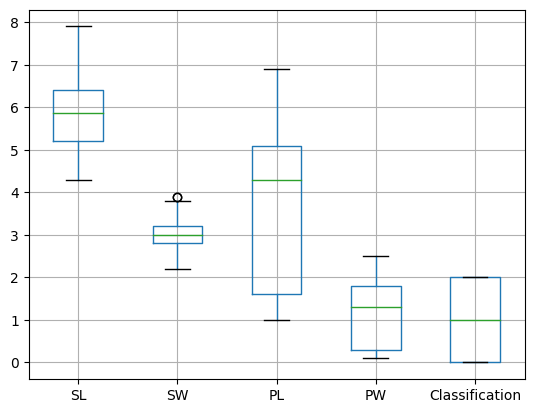

In [218]:
df.boxplot()
plt.show()

**Data Preprocessing**

In [219]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [220]:
x=df.drop('Classification',axis=1)
y=df['Classification']

In [221]:
print(x.shape, y.shape)

(145, 4) (145,)


In [222]:
#Splitting the dataset into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [223]:
x_train.shape

(116, 4)

In [224]:
x_test.shape

(29, 4)

In [225]:
# Scale the input features
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

**Model Building and Evaluation**

Using five models for classification of fraudulent and non-fraudulent transactions:

1.SVM(Support Vector Machine)

2.KNN(K Nearest neighbors)

3.Decision Tree

4.Random Forest

5.Logistic Regression

**SVM Classifier**

In [226]:
from sklearn.svm import SVC
sc_clf= SVC(kernel='linear')
sc_clf.fit(x_train,y_train)

SVC(kernel='linear')

In [227]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='micro'))
print('recall is',recall_score(y_test,y_pred,average='micro'))
print('f1 score is',f1_score(y_test,y_pred,average='micro'))

accuracy is 0.9310344827586207
precision is 0.9310344827586207
recall is 0.9310344827586207
f1 score is 0.9310344827586207


**KNN**

In [228]:
from sklearn .neighbors import KNeighborsClassifier
metric_k =[]
neighbors =np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [229]:
metric_k


[0.9310344827586207,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413]

In [230]:
classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)



In [231]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='micro'))
print('recall is',recall_score(y_test,y_pred,average='micro'))
print('f1 score is',f1_score(y_test,y_pred,average='micro'))

accuracy is 0.8620689655172413
precision is 0.8620689655172413
recall is 0.8620689655172413
f1 score is 0.8620689655172413


**Dicidion Tree**

In [232]:
from sklearn .tree import DecisionTreeClassifier
dt_clf =DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
pred_dt = dt_clf.predict(x_test)

In [233]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='micro'))
print('recall is',recall_score(y_test,y_pred,average='micro'))
print('f1 score is',f1_score(y_test,y_pred,average='micro'))

accuracy is 0.8620689655172413
precision is 0.8620689655172413
recall is 0.8620689655172413
f1 score is 0.8620689655172413


**Random Forest**

In [234]:
from sklearn .ensemble import RandomForestClassifier
rf_clf =RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
pred_rf = rf_clf.predict(x_test)

In [235]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='micro'))
print('recall is',recall_score(y_test,y_pred,average='micro'))
print('f1 score is',f1_score(y_test,y_pred,average='micro'))

accuracy is 0.8620689655172413
precision is 0.8620689655172413
recall is 0.8620689655172413
f1 score is 0.8620689655172413


**Logistic Regression**

In [236]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred =logit_model.predict(x_test)

In [237]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='micro'))
print('recall is',recall_score(y_test,y_pred,average='micro'))
print('f1 score is',f1_score(y_test,y_pred,average='micro'))

accuracy is 0.9310344827586207
precision is 0.9310344827586207
recall is 0.9310344827586207
f1 score is 0.9310344827586207


**Conclusion**

Logistic Regression and SVM classifier are give the better accuracy